<a href="https://colab.research.google.com/github/Shivani11032006/DA-Projects/blob/main/Superstore_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title: Sales & Profit Data Analysis

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The objective of this project is to analyze sales and profit data to:
- Identify profitable and loss-making categories
- Analyze regional performance
- Understand product-level contribution
- Support business decision-making using data insights

In [31]:
sales=pd.read_excel("/content/SuperStore Sales DataSet.xlsx")

In [32]:
sales.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,0,Online
1,4919,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,0,Online
2,4920,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,0,Cards
3,3074,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,0,Online
4,8604,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,0,Online


In [33]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID+O6G3A1:R6  5901 non-null   int64         
 1   Order ID          5901 non-null   object        
 2   Order Date        5901 non-null   datetime64[ns]
 3   Ship Date         5901 non-null   datetime64[ns]
 4   Ship Mode         5901 non-null   object        
 5   Customer ID       5901 non-null   object        
 6   Customer Name     5901 non-null   object        
 7   Segment           5901 non-null   object        
 8   Country           5901 non-null   object        
 9   City              5901 non-null   object        
 10  State             5901 non-null   object        
 11  Region            5901 non-null   object        
 12  Product ID        5901 non-null   object        
 13  Category          5901 non-null   object        
 14  Sub-Category      5901 n

In [34]:
sales.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode'],
      dtype='object')

In [35]:
sales.shape

(5901, 21)

In [36]:
sales.describe()

,Row ID+O6G3A1:R6,Order Date,Ship Date,Sales,Quantity,Profit,Returns
count,5901.000000,5901,5901,5901.000000,5901.000000,5901.000000,5901.000000
mean,5022.422471,2020-02-29 01:53:57.620742144,2020-03-04 00:08:47.097102336,265.345589,3.781901,29.700408,0.048636
min,1.000000,2019-01-01 00:00:00,2019-01-05 00:00:00,0.836000,1.000000,-6599.978000,0.000000
25%,2486.000000,2019-09-11 00:00:00,2019-09-15 00:00:00,71.976000,2.000000,1.795500,0.000000
50%,5091.000000,2020-03-16 00:00:00,2020-03-19 00:00:00,128.648000,3.000000,8.502500,0.000000
75%,7456.000000,2020-09-14 00:00:00,2020-09-16 00:00:00,265.170000,5.000000,28.615000,0.000000
max,9994.000000,2020-12-31 00:00:00,2021-01-05 00:00:00,9099.930000,14.000000,8399.976000,1.000000
std,2877.977184,NaN,NaN,474.260645,2.212917,259.589138,0.215124


Check Missing Values

In [37]:
sales.isnull().sum()

,0
Row ID+O6G3A1:R6,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [38]:
sales.isnull()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Convert Date Columns to Datetime

In [39]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])


Remove Duplicate Records

In [40]:
sales.duplicated().sum()

np.int64(0)

In [41]:
sales = sales.drop_duplicates()

Duplicate records were identified and removed to maintain data integrity.

In [42]:
sales.shape

(5901, 21)

In [43]:
# Extract Year and Month
sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month

# Monthly sales aggregation
monthly_sales = sales.groupby(['Year', 'Month'])['Sales'].sum().reset_index()


In [44]:
sales.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode', 'Year',
       'Month'],
      dtype='object')

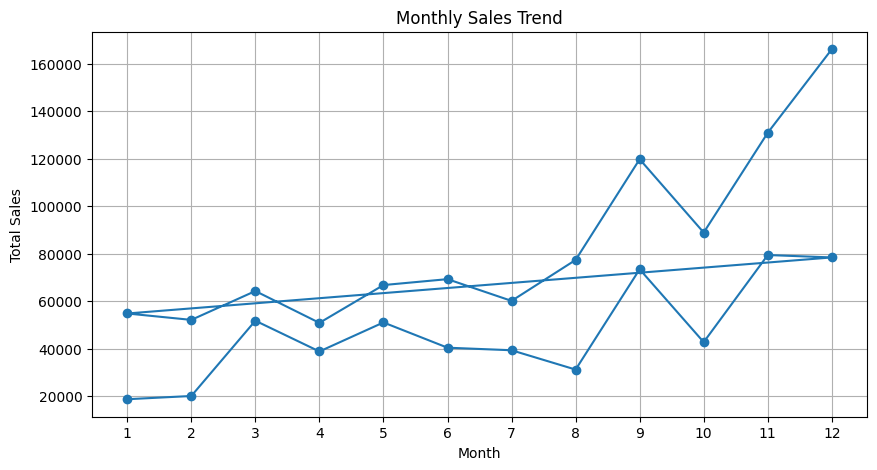

In [45]:
#Monthly Sales Trend
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


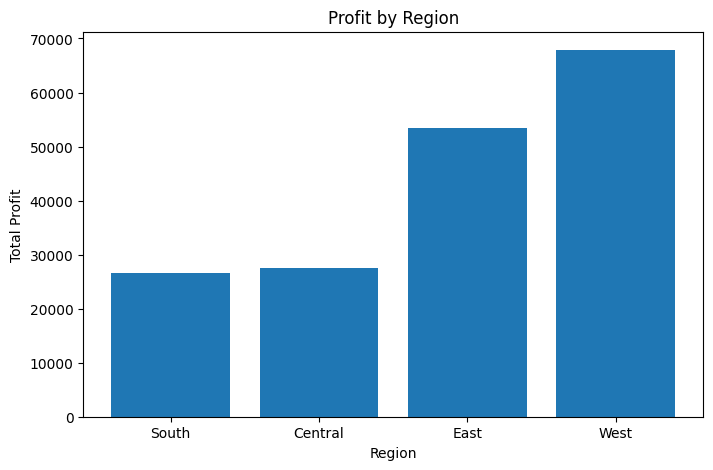

In [46]:
#Profit by Region
region_profit = sales.groupby('Region')['Profit'].sum().sort_values()
plt.figure(figsize=(8,5))
plt.bar(region_profit.index, region_profit.values)
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

Aggregates profit at regional level

Highlights top and bottom performing regions

Supports strategic regional decisions

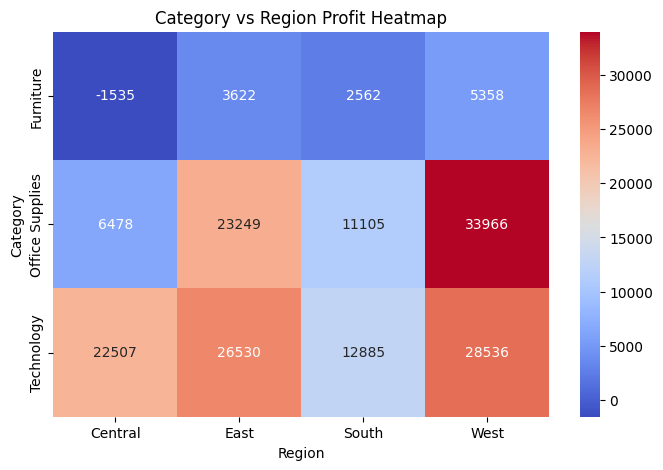

In [47]:
#Category vs Region Profit
# Create pivot table
pivot_table = pd.pivot_table(
    sales,
    values='Profit',
    index='Category',
    columns='Region',
    aggfunc='sum'
)
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Category vs Region Profit Heatmap')
plt.show()

Shows profit interaction between categories and regions

Identifies loss-making combinations

Easy visual comparison across dimensions

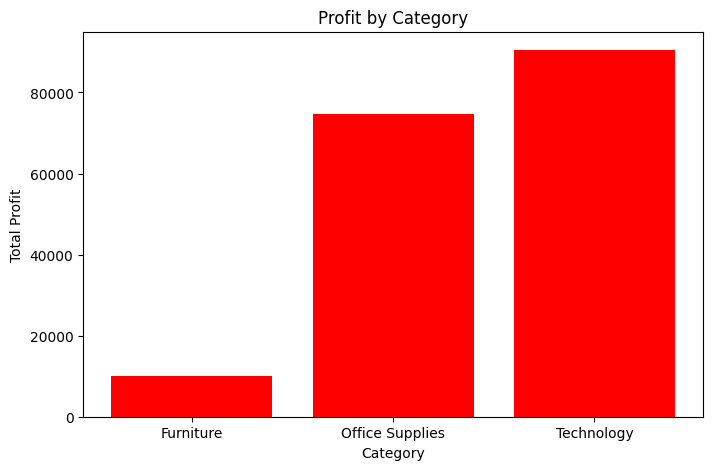

In [48]:
# Profit by category
category_profit = sales.groupby('Category')['Profit'].sum().sort_values()
plt.figure(figsize=(8,5))
plt.bar(category_profit.index, category_profit.values,color='red')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

Identifies best and worst performing categories

Supports product-level strategic decisions

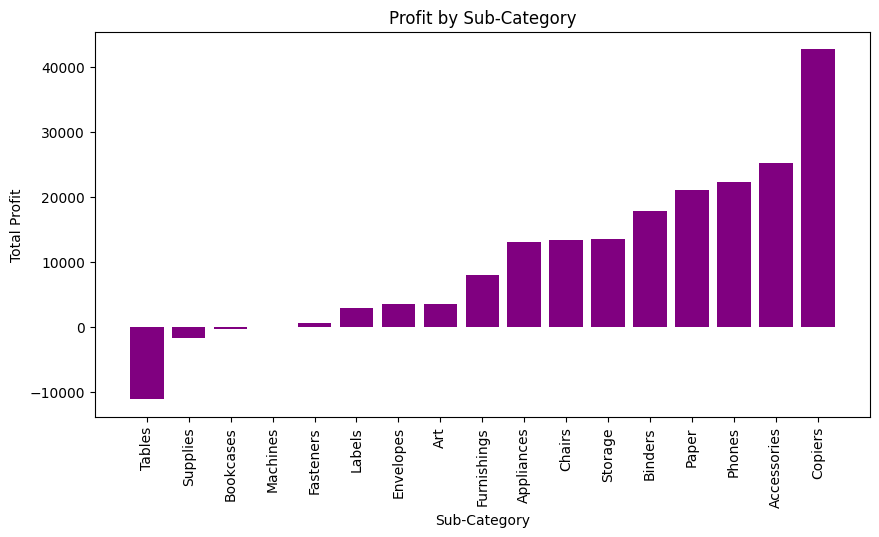

In [49]:
# Aggregate profit by sub-category
subcat_profit = sales.groupby('Sub-Category')['Profit'].sum().sort_values()
plt.figure(figsize=(10,5))
plt.bar(subcat_profit.index, subcat_profit.values,color='purple')
plt.xticks(rotation=90)
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.show()

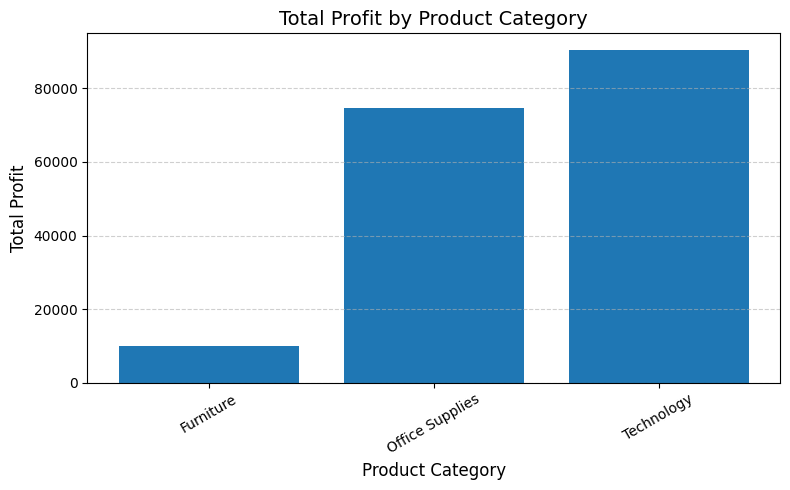

In [50]:
category_profit = sales.groupby("Category")["Profit"].sum().sort_values()
plt.figure(figsize=(8, 5))
plt.bar(category_profit.index, category_profit.values)
plt.title("Total Profit by Product Category", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Highlights individual product line performance

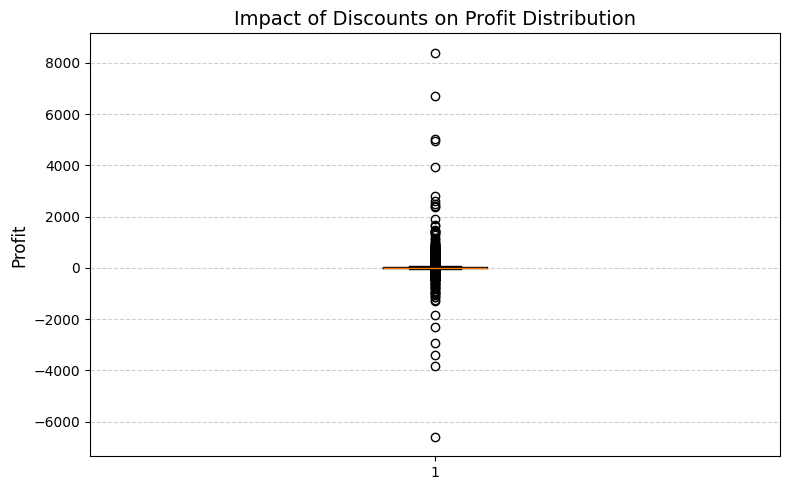

In [51]:

plt.figure(figsize=(8, 5))

# Boxplot
plt.boxplot(sales["Profit"], vert=True)

# Business-style labels
plt.title("Impact of Discounts on Profit Distribution", fontsize=14)
plt.ylabel("Profit", fontsize=12)

# Grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This plot shows profit spread under different discount levels, highlighting losses.

CONCLUSION:
This project successfully analyzed sales, profit, regional performance, and discount impact to derive meaningful business insights. Through systematic data cleaning, aggregation, and visualization, key patterns affecting profitability were identified.